In [3]:
import pandas as pd
%matplotlib inline

In [71]:
data13 = pd.read_csv("13zpallagi.csv")
data12 = pd.read_csv("12zpallagi.csv")
data11 = pd.read_csv("11zpallagi.csv")
data13 = data13[['STATE','zipcode','agi_stub','N1']].copy()
data12 = data12[['STATE','zipcode','AGI_STUB','N1']].copy()
data11 = data11[['STATE','ZIPCODE','agi_stub','N1']].copy()
colNames = columns=['STATE','zipcode', 'agi_stub','N','Year']

data13['Year'] = '2013'
data12['Year'] = '2012'
data11['Year'] = '2011'

#normalize columns
data13.columns = colNames
data12.columns = colNames
data11.columns = colNames
data12.columns

Index(['STATE', 'zipcode', 'agi_stub', 'N', 'Year'], dtype='object')

In [72]:
print(type(data12['Year']))
print(type(data13['Year']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [5]:
columns=['STATE','zipcode', 'agi_stub', 'N','Year']
combineddf = pd.DataFrame(columns=columns)
combineddf = combineddf.append(data13)
combineddf = combineddf.append(data12)
combineddf = combineddf.append(data11)
combineddf.columns = columns

In [93]:
from bokeh.plotting import Figure,output_notebook,show
from bokeh.models import ColumnDataSource, HoverTool, HBox, VBoxForm
from bokeh.models.widgets import Slider, Select, TextInput
from bokeh.io import curdoc
import matplotlib.cm as cm
import numpy as np
import ast 
from colour import Color

output_notebook()

axis_map = {
    "Number of Returns": "N",
    "Year": "Year",
}

red = Color("red")
blue = Color("blue")
colors = list(red.range_to(blue, 6))
colours = []

#zipcode
zipcode = TextInput(title="Enter Zipcode")
                    
                    
x_axis = Select(title="X Axis", value="Year")
y_axis = Select(title="Y Axis", value="Number of Returns")

# Create Column Data Source that will be used by the plot
source = ColumnDataSource(data=dict(x=[], y=[], color=[], zipcode=[], year=[], state=[]))

hover = HoverTool(tooltips=[
    ("Zipcode","@zipcode"),
    ("Year", "@year"),
    ("AGI", "@agi"),
    ("State","@state")
])
p = Figure(plot_height=600, plot_width=800, title="", toolbar_location=None, tools=[hover])
p.scatter(x="x", y="y", source=source, color="color", line_color=None)

def select_data(zipcode_val):
    #zipcode_val = 0 if zipcode.value.strip() == '' else int(zipcode.value.strip())
    selected = combineddf[combineddf['zipcode'] == zipcode_val]
    colours = [(colors[i-1]) for i in selected['agi_stub'].astype(int)]
    selected['color'] = colours
    return selected
def update(zipcode):
    df = select_data(int(zipcode))
    x_name = axis_map[x_axis.value]
    y_name = axis_map[y_axis.value]

    p.xaxis.axis_label = x_axis.value
    p.yaxis.axis_label = y_axis.value
    p.title = "Returns in Zipcode"
    source.data = dict(
        x=df[x_name].astype(int),
        y=df[y_name].astype(int),
        color=df['color'],
        zipcode=df["zipcode"],
        year=df["Year"],
        state=df["STATE"]
    )
    source.push_notebook
    return p
controls = [zipcode]
# for control in controls:
#     control.on_change('value', update)
    
inputs = HBox(VBoxForm(*controls), width=300)

update(0) # initial load of the data

curdoc().add_root(HBox(inputs, p, width=1100))
show(p)

Loading BokehJS ...

TypeError: 'str' object is not callable

In [134]:
import matplotlib.pyplot as plt
years = (2011,2012,2013)
def plotGraph(zipcode,state="",agi=0) :
    selected = combineddf[combineddf['zipcode'] == zipcode]
    
    if(zipcode != 0):
        state = (pd.unique(selected['STATE']).tolist())[0]
    if(state != ''):
        selected = selected[selected['STATE'] == state]
    if(agi != 0):
        selected = selected[selected['agi_stub'] == agi]
    fig, ax = plt.subplots()
    fig.set_size_inches(10.5, 10.5, forward=True)
    ax.scatter(selected['Year'].astype(int), selected['N'].astype(int),c=selected['agi_stub'].astype(int))
    ax.set_ylabel('Total Number of Returns')
    ax.set_xlabel('Year')
    ax.ticklabel_format(useOffset=False)
    for agi in (pd.unique(selected['agi_stub'])).tolist(): 
        agiGrp = selected[selected['agi_stub'].astype(int) == int(agi)]
        plt.plot(agiGrp['Year'], agiGrp['N'])
    for state, agi,x, y in zip(selected['STATE'],selected['agi_stub'],selected['Year'].astype(int),selected['N'].astype(int)): 
        label = {'State':state, 'AGI':agi}
        plt.annotate(label,xy = (x, y), xytext = (10,10),
        textcoords = 'offset points', ha = "right", va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    plt.xticks(years)
    plt.show()

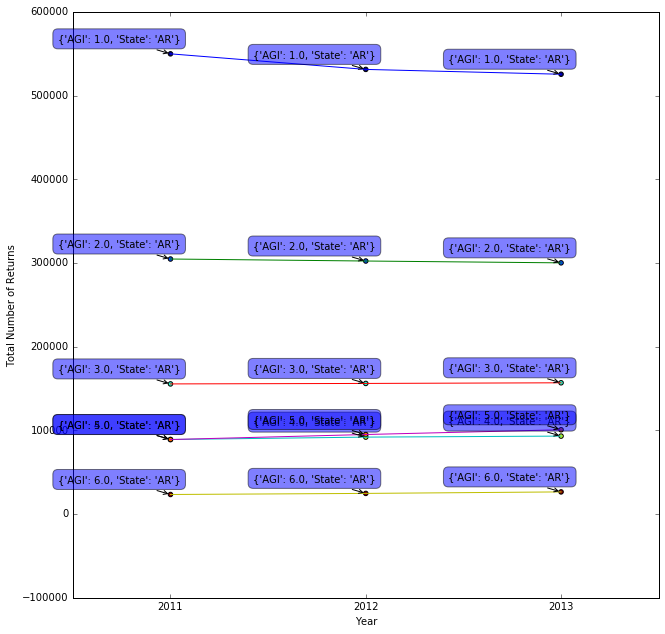

In [135]:
from ipywidgets import interact,IntText,Dropdown,IntSlider
states = (pd.unique(combineddf['STATE'])).tolist()
states.insert(0,'')
interact(plotGraph, 
         zipcode=IntText('0'),
         state=Dropdown(description="State", options=states),
         agi=IntSlider(description='AGI',min=0,max=6))